Could not save font_manager cache Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\tapir\.matplotlib\fontlist-v390.json.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.
C:\Users\tapir\AppData\Local\Temp\ipykernel_17392\531262365.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(myquery,sql_connect)


             name  avg_spending_per_customer  orders_percentage_of_total_sales
0       Northwest                  3757.3655                         14.476096
1       Northeast                 59311.3405                          0.973064
2         Central                 61351.5690                          1.064730
3       Southwest                  4261.0109                         19.214497
4       Southeast                 39213.4923                          1.269214
5          Canada                  6799.6602                         13.284445
6          France                  4331.6625                          8.976167
7         Germany                  2769.7798                          8.708222
8       Australia                  1910.7696                         21.259343
9  United Kingdom                  3376.0818                         10.774221


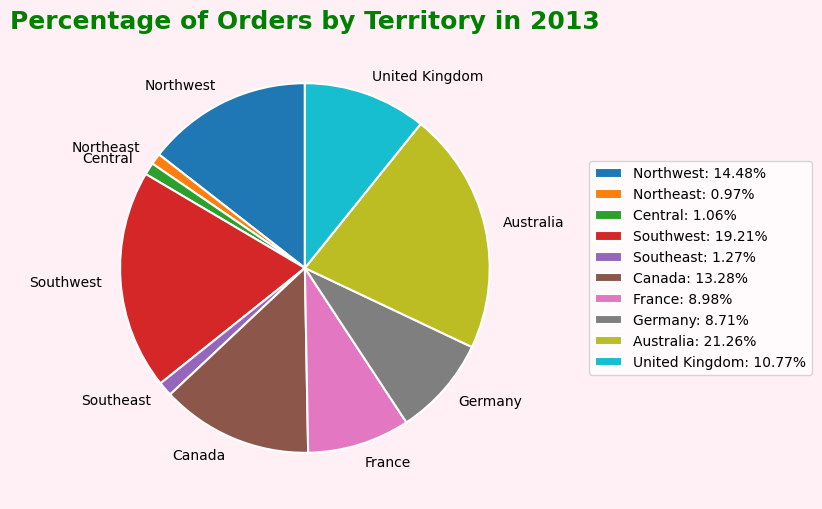

['Northwest' 'Northeast' 'Central' 'Southwest' 'Southeast' 'Canada'
 'France' 'Germany' 'Australia' 'United Kingdom']


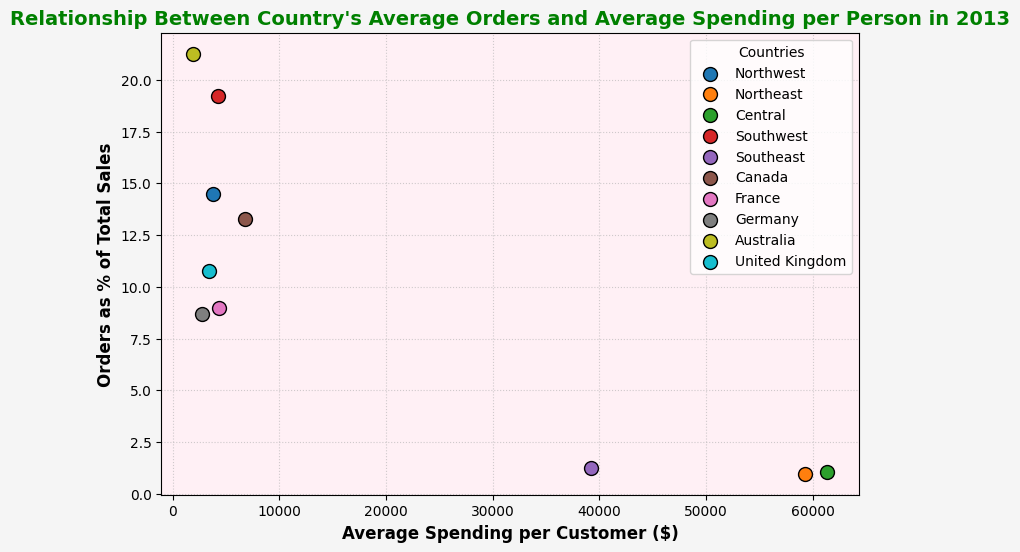

In [1]:
import pyodbc  # Importing a library that connects and executes SQL queries
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization

#Creation a connection to the SQL server
sql_connect = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=AVIPC\\SQLEXPRESS;"
    "DATABASE=AdventureWorks2019;"
    "Trusted_Connection=yes;")

myquery = """

with first as (

select 
 S_Order_Header.TerritoryID,
 Name, -- brought it from another table, 
 sum(TotalDue) as total_purchase_amount, -- calulates the sum of each country
 count(distinct CustomerID) customer_count,-- counts how many customers for each country
 count(salesorderid) as total_orders 

from Sales.SalesOrderHeader as S_Order_Header
 left join Sales.SalesTerritory as S_territory
 on S_Order_Header.TerritoryID = S_territory.TerritoryID

 where year(OrderDate) = 2013 --filter the year to 2013

 group by Name , S_Order_Header.TerritoryID

)
select 
name,
total_purchase_amount / customer_count as avg_spending_per_customer,-- calculates the spending average amount

total_orders * 1.0 ---- Ensuring no division by zero, calculating the distribution amount of orders
/ 
(select count(*) from Sales.SalesOrderHeader
where year(OrderDate) = 2013) * 100  
 
 as orders_percentage_of_total_sales -- calculates the distribution amount of orders

from first
order by TerritoryID

"""


# Executing the query and storing the result in a DataFrame  
df = pd.read_sql(myquery,sql_connect)

# Displaying the data
print(df)



labels = df['name']  # Countries names
sizes = df['orders_percentage_of_total_sales']  # Percentages from the query

# Creating a window
fig, ax = plt.subplots(figsize=(8,6))

#Creating pie chart
ax.pie(sizes, labels=labels, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'linestyle': 'solid'})

# Adding title
plt.title("Percentage of Orders by Territory in 2013", fontsize=18 ,color='green', fontweight="bold")

# Creating a list of legend entries with formatted text: "{label}: {size}%"
legend_entries = [f"{label}: {size:.2f}%" for label, size in zip(labels, sizes)]

# Adding the legend to the plot, positioning it with bbox_to_anchor
plt.legend(legend_entries,loc="center left", bbox_to_anchor=(1.1, 0.5)  # Adjusts the position of the legend outside the plot area
)
fig.patch.set_facecolor("lavenderblush")

plt.show()














# Creating a new figure and axes for the plot with a specified size
fig, ax = plt.subplots(figsize=(9, 6))

# Getting the unique countries from the 'name' column
unique_countries = df['name'].unique()  
print(unique_countries)

#Creating scatter graph using for loop
for i, country in enumerate(unique_countries):
    # Filter the dataset for the specific country
    subset = df[df['name'] == country]
    # Create a scatter plot for each country, with specific styling for the points
    plt.scatter(subset['avg_spending_per_customer'], subset['orders_percentage_of_total_sales'], label=country, s=100, edgecolors='black')

# The label for each country is used to display the country's name in the legend.


# Display the legend
plt.legend(title="Countries", facecolor="white", loc='upper right', fontsize=10)


# Setting the background color of the figure and the axes
fig.set_facecolor("whitesmoke")
ax.set_facecolor("lavenderblush")


#Adding grid lines
plt.grid(axis='both', linestyle=':', alpha=0.6)

# Setting the title for the plot
plt.title("Relationship Between Country's Average Orders and Average Spending per Person in 2013", fontsize=14, color='green', fontweight="bold")

# Adding labels to the X and Y axes
plt.xlabel("Average Spending per Customer ($)", fontsize=12, fontweight='bold')
plt.ylabel("Orders as % of Total Sales", fontsize=12, fontweight='bold')

# Display the plot
plt.show()


